# Aprendizaje supervisado: Clasificación y regresión

El **aprendizaje sueprvisado** se denomina así porque tenemos un conjunto de datos que está formado por instancias con sus características (*features*) y sus etiquetas (*labels*). La tarea en este tipo de problemas trata de construir un algoritmo de estimación a partir de los datos etiquetados, de tal manera que si le pasamos una instancia nueva para la que no conocemos su etiqueta, el algoritmo sea capaz de estimarla correctamente.

Algunos ejemplos de problemas de aprendizaje supervisado son:
- predecir la especie de lirio a partir de un conjunto de medidas de la flor.
- dada una fotografía de una persona, identificar a la persona en la foto.
- dada una lista de películas que una persona ha visto y evaluado, recomendar una lista de películas que no haya visto y que le puedan gustar (el llamdo sistema de recomendación)

Hay dos tipos de problemas dentro del aprendizaje supervisado: **clasificación** y **regresión**. En los problemas de clasificación, las instancias tienen asociada una etiqueta discreta, mientras que en los problemas de regresión, la etiqueta es un valor continuo. Por ejemplo, en el caso de los lirios, la tarea de determinar la especie es un problema de clasificación. Por otro lado, puede que querramos estimar el peso de una persona a partir de una serie de observaciones y en este caso tendríamos un problema de regresión porque la etiqueta (el peso) es un valor continuo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Ejemplo de problema de clasificación

El método de los **k vecinos más cercanos** o **k-nearest neighbors** (KNN) es uno de las estrategias más simples de aprendizaje: dada una nueva observación, buscamos en nuestro conjunto de datos que instancias tienen las características más parecidas y le asignamos la clase predonimante de entre esas instancias cercanas.

vamos a probar este algoritmo en nuestro problema de clasificación de los lirios:  

In [6]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
# creamos el modelo
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# ajustamos el modelo a nuestros datos
knn.fit(X, y)

KNeighborsClassifier()

In [10]:
# ¿Que especie de lirios tienen los sépalos de 3cm x 5cm y los pétalos de 4cm x 2cm?
result = knn.predict([[3, 5, 4, 2]])
print(result)
print(iris.target_names[result])

[1]
['versicolor']


También podemos hacer prediciones de las probabilidades de que nuestra nueva instancia a cada clase:

In [11]:
knn.predict_proba([[3, 5, 4, 2]])

array([[0. , 0.8, 0.2]])

C:\Users\franc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\franc\Desktop\github_repositories\Python_DataScientist_tutorial\03_MachineLearning\fig_code\helpers.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pl.pcolormesh(xx, yy, Z, cmap=cmap_light)


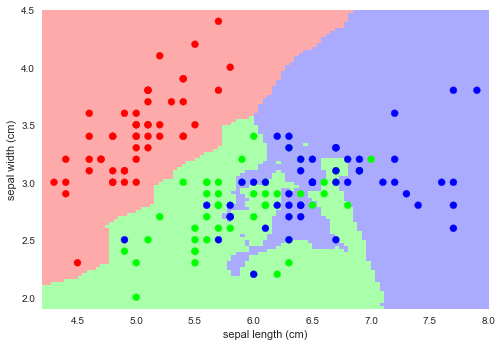

In [12]:
from fig_code import plot_iris_knn
plot_iris_knn()

---

### Ejercicio

Usa un estimador diferente en el mismo problema: `sklearn.svm.SVC`.

*Ten en cuenta que no tienes que saber que algoritmo es y como funciona para poder usarlo. Simplemente estamos prbando la interfaz de `scikit-learn`.*

*Si quieres profundizar más, intenta replicar la figura de arriba con el estimador SVC.*

In [5]:
from sklearn.svm import SVC

---

## Ejemplo de problema de regresión

Como ya hemos visto antes, uno de los ejemplos más simples del problema de regresión es ajustar una linea a los datos. Pero `scikit-learn` también incluye algoritmos de regresión más complicados.

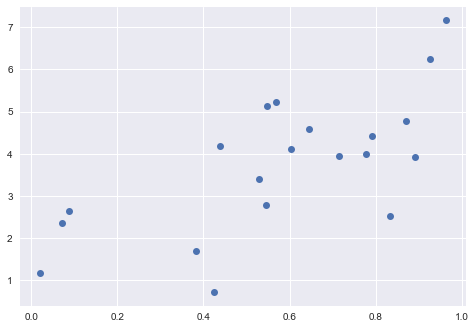

In [13]:
# Crear algunos datos
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

Vamos a ajustar un modelo de regresión lineal a este conjunto de datos:

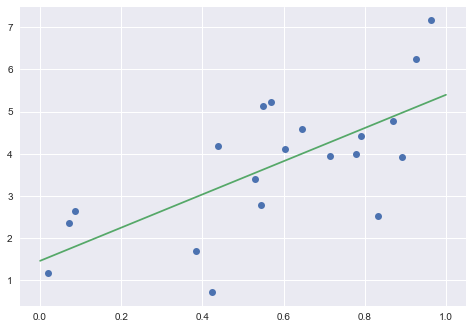

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

# Dibuja los datos y el modelo de predicción
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

Scikit-learn también tiene modelos más sofisticados:

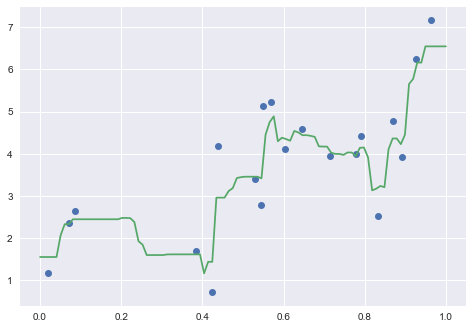

In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

# Dibuja los datos y el modelo de predicción
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

La discusión de si este modelo es mejor que el anterior o no depende de un número de factores que estudiaremos más adelante.

### Referencias
 - Iker y Mikel (UPV/EHU) lasaiker@fastmail.com, mikelbarrene@gmail.com